# Regression Analysis

Below is an anlysis of the `brainsize.csv` data found in this repo.  

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import data
brain = pd.read_table("brainsize.csv", sep = ";", index_col=0, na_values = ".")

brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [3]:
np.random.seed(242)
#crete new variable
partY = np.random.randn(len(brain))

#add new var to data
brain["partY"] = partY


In [4]:
brain.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,partY
1,Female,133,132,124,118.0,64.5,816932,-0.357519
2,Male,140,150,124,NaN,72.5,1001121,0.148448
3,Male,139,123,150,143.0,73.3,1038437,0.993531
4,Male,133,129,128,172.0,68.8,965353,1.838968
5,Female,137,132,134,147.0,65.0,951545,-0.744026


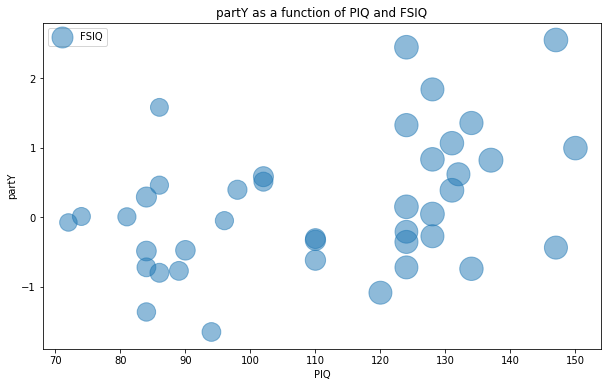

In [25]:
# plot partY var as a function of FSIQ and VIQ
plt.figure(figsize=(10, 6))
plt.scatter(x = brain["PIQ"], y = brain["partY"], s = brain["FSIQ"]*4, alpha = 0.5, label = "FSIQ")
plt.title("partY as a function of PIQ and FSIQ")
plt.xlabel("PIQ")
plt.ylabel("partY")
plt.legend()

The partY variable seems to increase with FSIQ and PIQ.

In [21]:
# create linear model with interaction only
from statsmodels.formula.api import ols
model1 = ols("partY ~ FSIQ:PIQ", brain).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     7.764
Date:                Sat, 23 May 2020   Prob (F-statistic):            0.00827
Time:                        18:05:00   Log-Likelihood:                -50.962
No. Observations:                  40   AIC:                             105.9
Df Residuals:                      38   BIC:                             109.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8531      0.392     -2.174      0.0

The interaction between FSIQ nad PIQ was a significant predictor of partY (*b*=0.00007, *t*=2.79, *p*(=.008). The overall model significantly predicted partY (F(1,38)=7.76, *p*=.008, $R^{2}$=.17).

In [7]:
np.random.seed(312)
#crete second random variable
partY2 = np.random.randn(len(brain))

#add new var to data
brain["partY2"] = partY2


In [8]:
model2 = ols("partY2 ~ FSIQ:PIQ", brain).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 partY2   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.037
Date:                Sat, 23 May 2020   Prob (F-statistic):              0.315
Time:                        17:46:29   Log-Likelihood:                -55.477
No. Observations:                  40   AIC:                             115.0
Df Residuals:                      38   BIC:                             118.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3261      0.439      0.742      0.4

The interaction of FSIQ and PIQ did not significantly predict partY2 (*p*=.32).